# Import packages + MyPCA + MyKMeans and Iris dataset.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
from sklearn import datasets
import scipy.stats as spst
from sklearn.datasets import make_spd_matrix
from scipy.special import softmax

In [ ]:
os.getcwd()

'/content/drive/My Drive/CS229/Notes7b-GMM'

In [ ]:
%cd /content/drive/My Drive/CS229/Notes7b-GMM

/content/drive/My Drive/CS229/Notes7b-GMM


In [ ]:
iris = datasets.load_iris()
iris.target_names
X = iris.data
y = iris.target

In [ ]:
# PCA
def myPCA(X:np.ndarray, n_dimensions:int):
  # N, d = X.shape
  # Centering
  X_centered = X - X.mean(axis=0) 

  # Covariance Matrix of d*d
  Sigma = np.dot(X_centered.T, X_centered)

  # SVD
  U, Lambda, V = np.linalg.svd(Sigma)

  X_centered_PC = np.dot(U[:,:n_dimensions].T, X_centered.T).T
  X_PC = X_centered_PC + X.mean(axis=0)[:n_dimensions]

  # Purposely rescale and add negative sign to mimic Sklearn's PCA
  return -(X_PC - X_PC.mean(axis=0))/X_PC.std(axis=0) 

In [ ]:
def myKMeans (X: np.ndarray, k: int, iterations=100, tol=0.001):
  N, d = X.shape
  mu = X[np.random.choice(range(N), size=k)]
  c = np.zeros(N)

  for step in tqdm(range(iterations)):
    prev_mu = mu.copy()

    for i in range(N):
      c[i] = np.argmin(np.linalg.norm(X[i] - mu, axis=1)**2)
    for j in range(k):
      mu[j] = np.mean(X[np.arange(N)[c==j]], axis=0)

    if (np.sum(np.linalg.norm(prev_mu - mu,axis=1)) < tol):
      break
  distortion = np.sum([np.sum(np.linalg.norm(X[np.arange(N)[c==i]] - mu[i], axis=1)**2) for i in range(k)])
  print(f"distortion: {distortion}")

  return c, mu, distortion

# GMM

In [ ]:
def E_step(x, phi, mu, Sigma):
    # x: (N, d)
    # phi: (k,)
    # mu: (k,d)
    # Sigma: (k, d, d)

    # w = post_z: (N, k)
    
    N, d = x.shape
    k = phi.shape[0]
    post_z = np.zeros((N,k))

    for i in range(N):
        numerator = [spst.multivariate_normal.pdf(x[i], mean=mu[j], cov=Sigma[j]) * phi[j] for j in range(k)]
        sum = np.sum(numerator)
        post_z[i] = numerator / sum
    return post_z

In [ ]:
def M_step(x, w):
    # phi: (k,)
    # mu: (k, d)
    # Sigma: (k, d, d) 

    N, d = x.shape
    _, k = w.shape
    phi = np.mean(w, axis=0)
    mu = np.dot(w.T, x) / np.expand_dims(np.sum(w, axis=0),axis=1)    
    Sigma = np.zeros((k,d,d))
    for j in range(k):
        Sigma[j] = np.sum([w[i][j] * np.outer((x[i]-mu[j]), (x[i]-mu[j]).T) for i in range(N)], axis=0) / np.sum(w[:, j])
    return phi, mu, Sigma

In [ ]:
def myGMM (X: np.ndarray, k: int, iterations=100, tol=0.00001):
    N, d = X.shape
    X_sample = X[[np.random.choice(range(N)) for i in range(k)]]

    phi = softmax(np.random.random(size=k))
    mu = X_sample
    Sigma = np.concatenate([make_spd_matrix(d) for i in range(k)], axis=0).reshape(k,d,d)

    for step in tqdm(range(iterations)):
        prev_phi = phi
        w = E_step(X, phi, mu, Sigma)
        phi, mu, Sigma = M_step(X, w)
        if np.sum(np.square(phi-prev_phi)) < tol:
            break
        
    return w

# Compare with Ground Truth & K-Means

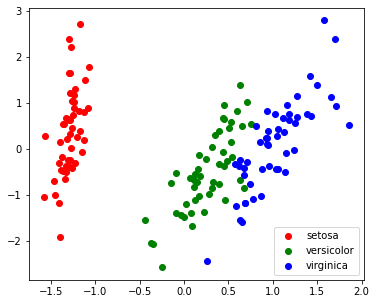

In [ ]:
# Ground Truth Label
X_PC2 = myPCA(X, 2)
target_ids = range(len(iris.target_names))


plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_PC2[y==i, 0], X_PC2[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

distortion: 78.85144142614601



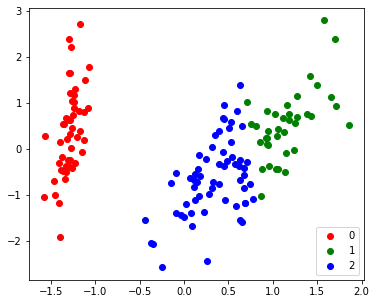

In [ ]:
# K-means with 3 clusters
cluster, centroids, distortion = myKMeans(X, 3)
plt.figure(figsize=(6,5))
for i, c, label in zip(range(3), 'rgbcmykw', range(3)):
  plt.scatter(X_PC2[cluster==i, 0], X_PC2[cluster==i, 1], c=c, label=label)
plt.legend()
plt.show()

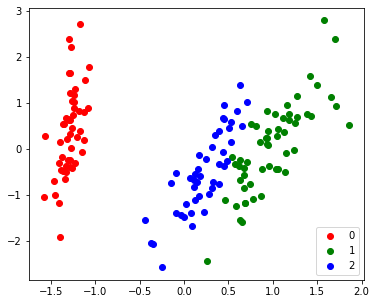

In [ ]:
# GMM with 3 clusters
w = myGMM(X, 3)
cluster_GMM = np.argmax(w,axis=1)

plt.figure(figsize=(6,5))
for i, c, label in zip(range(3), 'rgbcmykw', range(3)):
  plt.scatter(X_PC2[cluster_GMM==i, 0], X_PC2[cluster_GMM==i, 1], c=c, label=label)
plt.legend()
plt.show()

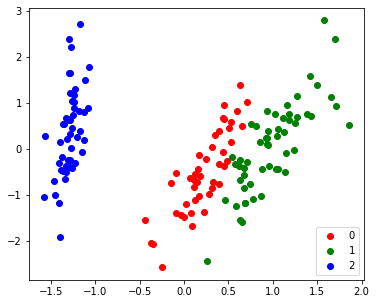

In [ ]:
# GMM with 3 clusters
w = myGMM(X, 3)
cluster_GMM = np.argmax(w,axis=1)

plt.figure(figsize=(6,5))
for i, c, label in zip(range(3), 'rgbcmykw', range(3)):
  plt.scatter(X_PC2[cluster_GMM==i, 0], X_PC2[cluster_GMM==i, 1], c=c, label=label)
plt.legend()
plt.show()

# Remark

Remark: GMM is more volatile than K-Means and the evaluation metric is said to be BIC. Let's deal with this later.

$$\ell(\theta|\mathbf{x})=\sum_{i=1}^{N} \log\left( \sum_{m=1}^{M} \alpha_m \phi(x_i|\mu_m,\Sigma_m)\right)$$

$$\theta=\{\alpha_1,...,\alpha_M,\mu_1,...,\mu_M,\Sigma_1,...,\Sigma_M\}$$

In [ ]:
!jupyter nbconvert --to markdown GMM.ipynb

[NbConvertApp] Converting notebook GMM.ipynb to markdown
[NbConvertApp] Support files will be in GMM_files/
[NbConvertApp] Making directory GMM_files
[NbConvertApp] Making directory GMM_files
[NbConvertApp] Making directory GMM_files
[NbConvertApp] Making directory GMM_files
[NbConvertApp] Writing 4767 bytes to GMM.md
